# Ainda sobre Regularização... Vamos falar sobre árvores?


Nossas últimas aulas falaram sobre regularização, cujo intuito é reduzir a variância dos modelos, fazendo com que esses sejam menos vulneráveis em relação ao overfitting.
Até aqui, vimos como alterar a função de erro do gradiente descendente. Hoje, falaremos um pouco sobre os hiperparâmetos das árvores de decisão e como que a escolha de cada um deles afeta a estrutura da árvore e está ligada ao overfitting. Ao fim, veremos como podar nossa árvore para melhorar a sua generalização.

# Pré-Prunning

## criterion

Quando estudamos o processo de desenvolvimento/treinamento das árvores de decisão, falamos que elas baseavam-se em critérios de divisão e estes eram basicamente dois: entropia e gini.

<img src="https://miro.medium.com/max/852/0*9ORK1-MuC7FEcsiq">

Por padrão, esse parâmetro é definido como ```criterion=gini```. Estudos apontam que apenas 2% das vezes os resultados diferem entre entropia e gini. Portanto, não é um hiperparâmetro tão decisivo para a performance das árvores. O método de entropia, por sua vez, é mais demorado. Na prática, não precisaremos ajustar esse hiperparâmetro, poderemos deixar o padrão.


## splitter

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ4HyvKCW_FajF1og2nAmhn-5d38VlqSAj7YQ&usqp=CAU">

Esse hiperparâmetro traz 2 opções: ```best``` e ```random```. Na opção best, as features escolhidas para cada nó são aquelas cujo ganho de informação seja maior/redução de entropia/redução de impureza.

A única diferença é que no divisor ```best``` ele avalia todas as divisões usando o critério antes da divisão, enquanto o divisor ```random``` usa uma função uniforme aleatória com ```min_feature_value```, ```max_feature_value``` e ```random_state```  de entradas. 

Digamos que você tenha centenas de features, então o divisor ```best``` seria ideal porque ele calculará as melhores features para dividir com base na medida de impureza e usará isso para dividir os nós, ao passo que se você escolher ```random``` terá uma grande chance de acabar com features que realmente não fornecem tanta informação, o que levaria a uma árvore mais profunda e menos precisa.
Por outro lado, o divisor ```random``` tem algumas vantagens, especificamente, uma vez que seleciona um conjunto de features aleatoriamente e divide, ele não tem a sobrecarga computacional de calcular a divisão ideal. Além disso, também é menos sujeito a overfitting porque você não está essencialmente calculando a melhor divisão antes de cada divisão e a aleatoriedade adicional o ajudará aqui, então, se seu modelo estiver overfitando, você pode alterar o divisor para ```random``` e treinar novamente.
Portanto, para uma árvore com poucos recursos sem nenhum ajuste excessivo, eu escolheria o divisor ```best``` para garantir que você obtenha a melhor arquitetura de modelo possível.

## max_depth

<img src="https://miro.medium.com/max/1990/1*tMU0XhEbj5aKgGt9RX-UQQ.png" width=400>

O hiperparâmetro ```max_depth``` define a profundidade máxima da árvore. Por padrão, nenhuma profundidade máxima é definida e isso leva ao overfitting, pois as folhas são completamente puras, ao ponto de cada folha conter apenas uma única instância. A árvore cresce indefinidamente até que todas as folhas sejam puras ou até que todas as folhas contenham menos do que min_samples_split amostras (número mínimo de amostras em um nó para o nó poder sofrer divisão).
A profundidade máxima teórica que uma árvore de decisão pode atingir é um a menos que o número de amostras de treinamento, mas nenhum algoritmo permitirá que você chegue a esse ponto por razões óbvias, uma das grandes razões é o overfitting. Observe aqui que é o número de amostras de treinamento e não o número de recursos, porque os dados podem ser divididos no mesmo recurso várias vezes.

Em geral, quanto mais profundo você permite que sua árvore cresça, mais complexo seu modelo se tornará, porque você terá mais divisões e captura mais informações sobre os dados e esta é uma das principais causas do sobreajuste em árvores de decisão porque seu modelo irá se encaixam perfeitamente para os dados de treinamento e não serão capazes de generalizar bem no conjunto de teste. Portanto, se o seu modelo estiver com overfitting, reduzir o número de ```max_depth``` é uma forma de combater o overfitting.

Também é ruim ter uma profundidade muito baixa porque seu modelo será insuficiente para encontrar o melhor valor, experimente porque overfitting e underfitting são muito subjetivos para um conjunto de dados, não há um valor único para todas as soluções. Então, o que eu geralmente faço é deixar o modelo decidir primeiro max_depth e, em seguida, comparando minhas pontuações de treinamento e teste, procuro overfitting ou underfitting e, dependendo do grau, diminuo ou aumento a ```max_depth```.

## min_samples_split

<img src="https://gblobscdn.gitbook.com/assets%2F-LagOeJ2nL90MQERwhxy%2F-LjmGR4-Zkpsp-CXV3zt%2F-Lk-zrrQar1T7mfpJ4jY%2Fimage.png?alt=media&token=75b26a95-2227-4832-8860-8e1086a4743b" width=400>

```min_samples_split``` é o número mínimo de amostras em cada nó, necessárias para que haja um split. Se, por exemplo, definirmos ```min_samples_split``` como 11, isso significa que o nó só poderá se dividir, caso haja pelo menos 11 amostras nele. Caso contrário, esse nó  é transformado em folha. Por padrão,  o modelo inicializa com o valor 2. Estudos mostram que o valor ideal pode estar entre 2 e 40 para o algoritmo CART, o qual é implementado no ```scikit-learn```. Esse parâmetro é um dos responsáveis por controlar o overfitting. Valores altos ajudam a previnir o overfitting, isso pois ajudará o modelo a não aprender relações que sejam específicas de uma amostra em particular ou de um conjunto de amostras (que podem ser ruído). Em contrapartida, valores muito altos podem levar a underfitting. Dependendo do nível de ovefitting e underfitting, poderemos ajustar esse valor até achar o melhor.

Também podemos passar um número float para ele e então o modeo entenderá que o ```min_samples_split``` a ser utilizado é ```ceil(min_samples_split * n_samples)``` 

## min_samples_leaf

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/Screenshot-2020-03-04-at-15.34.46.png">

O número mínimo de amostras necessárias para estar em um nó folha. Um ponto de divisão em qualquer profundidade só será considerado se deixar pelo menos min_samples_leaf amostras de treinamento em cada um dos ramos esquerdo e direito. Isso pode ter o efeito de suavizar o modelo, especialmente na regressão.
Se int, considere min_samples_leaf como o número mínimo.
Se float, então min_samples_leaf é uma fração e ceil (min_samples_leaf * n_samples) é o número mínimo de amostras para cada nó.
Semelhante a ```min_samples_split```, ```min_samples_leaf``` também é usado para controlar o sobreajuste, definindo que cada folha tem mais de um elemento. Assim, garantindo que a árvore não supere o conjunto de dados de treinamento, criando um monte de pequenos ramos exclusivamente para uma amostra cada. Na realidade, o que isso está realmente fazendo é simplesmente dizer à árvore que cada folha não precisa ter uma impureza de 0.
O artigo, Um estudo empírico sobre ajuste de hiperparâmetros de árvores de decisão [5], também afirma que os valores min_samples_leaf ideais tendem a estar entre 1 a 20 para o algoritmo CART. Este artigo também indica que min_samples_split e min_samples_leaf são os maiores responsáveis ​​pelo desempenho das árvores finais de sua análise de importância relativa.
De acordo com o scikit-learn, podemos usar min_samples_split ou min_samples_leaf para garantir que várias amostras informem todas as decisões na árvore, controlando quais divisões serão consideradas. Eles também dizem que um número muito pequeno geralmente significa que a árvore se ajustará demais, enquanto um número grande impedirá que a árvore aprenda os dados e isso deve fazer sentido. Acho que uma exceção a isso é quando você tem um problema de classe desequilibrada, porque então as regiões em que a classe minoritária estará em maioria serão muito pequenas, então você deve escolher um valor mais baixo.

# Pós Prunning

As árvores de decisão estão sujeitas a ajustes excessivos. As técnicas de poda garantem que as árvores de decisão tendam a generalizar melhor os dados "não vistos". Uma árvore de decisão pode ser podada antes ou / e depois de construí-la. No entanto, qualquer um dos métodos de poda é suficiente para remover o sobreajuste. A pós-poda é uma forma mais científica de podar árvores de decisão.

Essa "técnica de regularizaçao" "poda" a árvore depois que ela crescer totalmente. Ele remove uma subárvore e a substitui por um nó folha, a classe mais frequente da subárvore determina o rótulo da nova folha.
Matematicamente, a medida de complexidade de uma árvore T é dada por:

<img src="https://miro.medium.com/max/684/1*qP9F0y2MPUyC9lCFKChNdQ.png">

R(T) — Erro total nos nós folhas<br>
|T| — Número total de nós folhas<br>
α — Parâmetro de complexidade (número inteiro)


In [1]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('train.csv')
X,y = data[[ 'Pclass',  'Sex', 'Age','SibSp','Parch',  'Fare',   'Cabin','Embarked']],data['Survived']
X,y = X.fillna(0),y.fillna(0)
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [3]:
model = DecisionTreeClassifier(random_state=1).fit(X_train,y_train)
y_predicted = model.predict(X_test)
print('Training accuracy: ',model.score(X_train,y_train))
print('Test Accuracy: ',model.score(X_test,y_test))

Training accuracy:  0.9903691813804173
Test Accuracy:  0.7761194029850746


É evidente a partir da disparidade entre as pontuações de precisão do treinamento e do teste que o modelo está excessivamente ajustado.
A classe DecisionTreeClassifier em sklearn fornece ccp_alpha como um parâmetro para pós-remoção. O parâmetro ccp_alpha fornece um limite para alfas eficazes, ou seja, o processo de poda continua até que o alfa mínimo efetivo da árvore podada não seja maior do que ccp_alpha. A classe DecisionTreeClassifier também fornece um método cost_complexity_pruning_path que implementa o processo de poda e retorna os alfas efetivos (e as impurezas correspondentes de suas árvores podadas)

In [4]:
path=DecisionTreeClassifier(random_state=1).cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

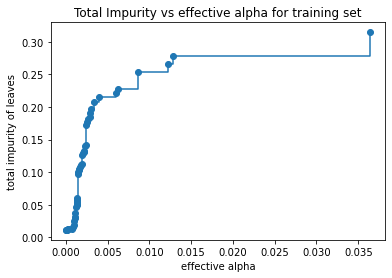

In [5]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()


Como é evidente no gráfico acima, o valor zero de alfa corresponde à impureza mínima (árvore não podada) e como o valor de alfa tende ao infinito, a árvore tende a ser mais impura.
Em seguida, construímos uma floresta de árvores com diferentes valores de valores ccp_alpha extraídos de cost_complexity_pruning_path em ordem. A última árvore será o nó raiz.

In [6]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1,ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

Let’s print properties of the last tree(one with highest ccp_alpha value).


In [7]:
print("Number of nodes in the last tree is: {} with ccp_alpha: {} and a depth of: {}".format(
clfs[-1].tree_.node_count, ccp_alphas[-1],clfs[-1].tree_.max_depth))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.1486931782834916 and a depth of: 0


A última árvore na 'lista' clfs tem o maior valor ccp_alpha, é uma árvore de nó único (e, portanto, uma profundidade de 0). Podemos remover esta árvore e continuar.

In [8]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

Representamos graficamente como os diferentes valores de ccp_alpha influenciam o número de nós e a profundidade das árvores podadas correspondentes.

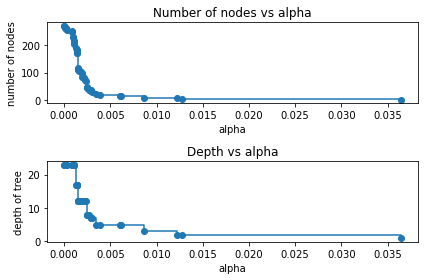

In [9]:
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()
plt.show()

O gráfico mostra que com o valor zero do alfa efetivo a árvore gerada tem o maior número de nós e é a mais profunda (cresce ao máximo), enquanto que à medida que o alfa efetivo aumenta, as árvores são mais podadas e têm relativamente menos nós e menos profundas .
Obtemos a lista de pontuações médias de precisão de treinamento e teste para cada uma das árvores (restantes) e verificamos como as pontuações de precisão de treinamento / teste mudam com a mudança em ccp_alpha.

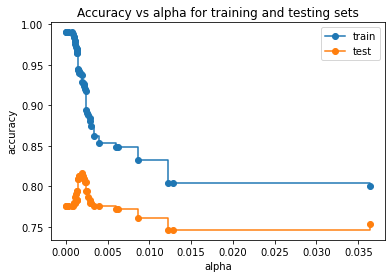

In [10]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

Com os valores iniciais menores de alfa, há uma grande disparidade entre as pontuações de precisão de treinamento e teste. Quando o valor alfa aumenta, a precisão do treinamento diminui e a precisão do teste aumenta até atingirmos o ponto ideal (maior pontuação de precisão do teste). No gráfico, o ponto ideal fica entre 0 e 0,005 de alfa, onde obtemos a árvore podada ideal. Além desse ponto, com um aumento em alfa, a árvore é podada demais. Isso eventualmente leva a um ajuste insuficiente, diminuindo os escores de precisão do treinamento e do teste.
Agora extraímos o "melhor" classificador que fornecerá a pontuação máxima de precisão do teste.

In [11]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print('Training accuracy of best model: ',best_model.score(X_train, y_train))
print('Test accuracy of best model: ',best_model.score(X_test, y_test))

Training accuracy of best model:  0.9373996789727127
Test accuracy of best model:  0.8171641791044776


Em comparação com o modelo baseline, certamente a diferença entre as pontuações de precisão de treinamento e teste é menor. Podemos inferir que o sobreajuste no modelo foi reduzido usando pós-poda.